In [1]:
import pandas as pd 

df_gyeonggi= pd.read_excel('/home/jinsa/Downloads/GGD_RouteInfo_M.xlsx') #경기 버스 정보
df_gyeonggi.head()

/home/jinsa/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,순번,관할관청,운행업체,노선번호,노선ID,기점,기점_STATION_ID,종점,종점_STATION_ID,주중배차간격,주말배차간격,상행첫차,상행막차,하행첫차,하행막차
0,1,가평군,가평교통,50-5,239000002,목동터미널,239000272,용수동종점,239000052,370분,370분,09:20,19:05,10:10,19:50
1,2,가평군,가평교통,40-5,239000005,현리터미널,239000687,귀목종점,239000123,NaN,NaN,06:40,17:00,07:10,17:30
2,3,가평군,가평교통,43,239000006,현리터미널,239000687,청평터미널,239000738,690분,690분,06:00,19:20,06:20,19:40
3,4,가평군,가평교통,40-6,239000007,현리터미널,239000687,행현2리,239000167,310분,310분,07:20,16:50,07:40,17:10
4,5,가평군,가평교통,30-5,239000010,청평터미널,239000738,고재,239000496,130분,130분,06:20,20:00,06:50,20:30


In [2]:
df_gyeonggi = df_gyeonggi[['관할관청', '노선번호','노선ID','기점','기점_STATION_ID','종점','종점_STATION_ID']]
df_gyeonggi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   관할관청           3598 non-null   object
 1   노선번호           3598 non-null   object
 2   노선ID           3598 non-null   int64 
 3   기점             3598 non-null   object
 4   기점_STATION_ID  3598 non-null   int64 
 5   종점             3598 non-null   object
 6   종점_STATION_ID  3598 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 196.9+ KB


In [3]:
df_incheon = pd.read_excel('../DATA/인천버스노선현황.xls')
df_incheon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   노선번호        324 non-null    object
 1   기점(출발지)     324 non-null    object
 2   종첨(도착지)     324 non-null    object
 3   평일기점시간      324 non-null    object
 4   토요일기점시간     324 non-null    object
 5   공휴일기점시간     324 non-null    object
 6   평일회차시간      324 non-null    object
 7   토요일회차시간     324 non-null    object
 8   공휴일회차시간     324 non-null    object
 9   평일배차간격(분)   324 non-null    object
 10  토요일배차간격(분)  324 non-null    object
 11  공휴일배차간격(분)  324 non-null    object
 12  운수사         320 non-null    object
 13  전화번호        299 non-null    object
dtypes: object(14)
memory usage: 35.6+ KB


In [4]:
len(df_gyeonggi['노선번호']), len(df_incheon['노선번호'])

(3598, 324)

In [6]:
import mysql.connector

yespa_db = mysql.connector.connect(
    host = 'database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'eda_team',
    database = 'eda_project',
    password = '123456'
)

cur = yespa_db.cursor(buffered=True, dictionary=True)
cur.execute('SELECT * FROM gihu_service2')

result = cur.fetchall()
    
yespa_db.close()

df_seoul=pd.DataFrame(result)
df_seoul

,노선번호,승하차
0,0017,O
1,01A,O
2,01B,O
3,0411,O
4,100,O
...,...,...
627,종로11,O
628,종로12,O
629,종로13,O
630,중랑01,O


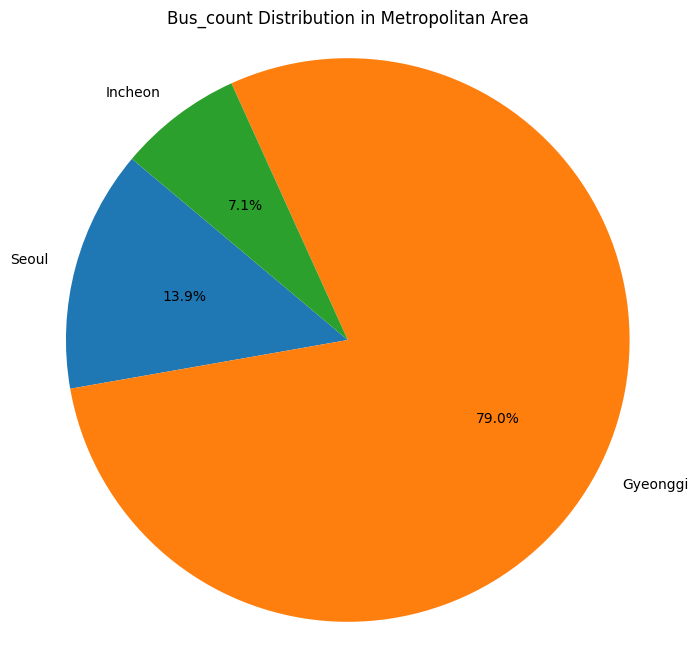

In [25]:
import matplotlib.pyplot as plt

labels = ['Seoul', 'Gyeonggi', 'Incheon']
sizes = [len(df_seoul['노선번호']), len(df_gyeonggi['노선번호']), len(df_incheon['노선번호'])]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Bus_count Distribution in Metropolitan Area')

plt.axis('equal')

plt.show()


In [27]:
total_bus_count =len(df_seoul['노선번호'])+ len(df_gyeonggi['노선번호'])+ len(df_incheon['노선번호'])
len(df_seoul[df_seoul['승하차']=='O'])

619

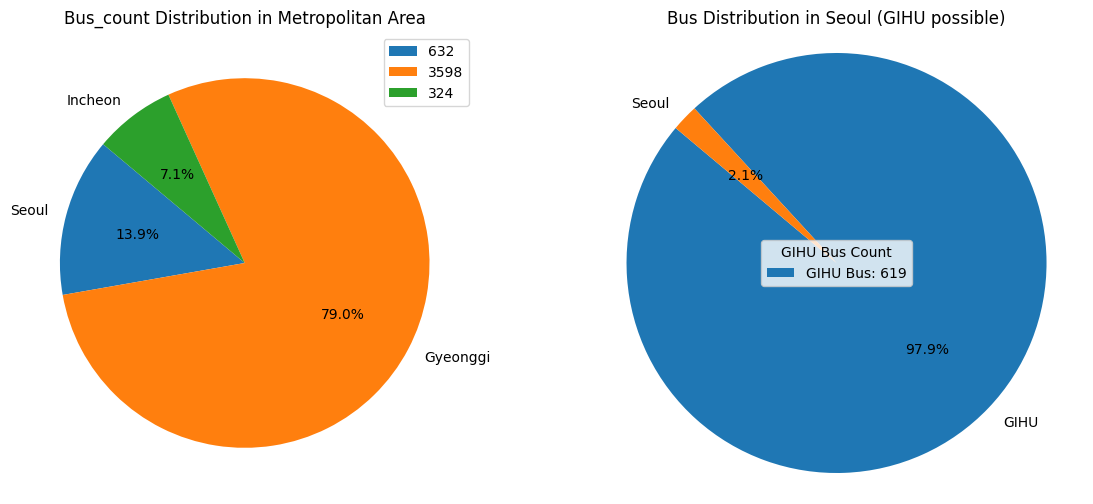

In [ ]:
import matplotlib.pyplot as plt

total_bus_count_seoul = len(df_seoul['노선번호'])
total_bus_count_gyeonggi = len(df_gyeonggi['노선번호'])
total_bus_count_incheon = len(df_incheon['노선번호'])

GIHU_bus_count = len(df_seoul[df_seoul['승하차'] == 'O'])



labels = ['Seoul', 'Gyeonggi', 'Incheon']
sizes = [total_bus_count_seoul, total_bus_count_gyeonggi, total_bus_count_incheon]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Bus_count Distribution in Metropolitan Area')
axs[0].legend([total_bus_count_seoul,total_bus_count_gyeonggi,total_bus_count_incheon], loc='upper right')

labels_seoul = ['GIHU', 'Seoul']
sizes_seoul = [GIHU_bus_count ,total_bus_count_seoul - GIHU_bus_count]
axs[1].pie(sizes_seoul, labels=labels_seoul, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Bus_count Distribution in Seoul (GIHU possible)')

axs[1].legend(title="GIHU Bus Count", labels=[f"GIHU Bus: {GIHU_bus_count}"], loc="center")

plt.axis('equal')
plt.show()